# **Description:**

This dataset contains information about bank customers and their churn status, indicating whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

# **Features:**

*   **RowNumber:** The sequential number assigned to each row in the dataset.
*   **CustomerId:** A unique identifier for each customer.
*   **Surname:** The surname of the customer.
*   **CreditScore:** The credit score of the customer.
*   **Geography:** The geographical location of the customer (e.g., country or region).
*   **Gender:** The gender of the customer.
*   **Age:** The age of the customer.
*   **Tenure:** The number of years the customer has been with the bank.
*   **Balance:** The account balance of the customer.
*   **NumOfProducts:** The number of bank products the customer has.
*   **HasCrCard:** Indicates whether the customer has a credit card (binary: yes/no).
*   **IsActiveMember:** Indicates whether the customer is an active member (binary: yes/no).
*   **EstimatedSalary:** The estimated salary of the customer.
*   **Exited:** Indicates whether the customer has exited the bank
(binary: yes/no).



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [8]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print()

Value counts for column 'RowNumber':
RowNumber
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64

Value counts for column 'CustomerId':
CustomerId
15656710    1
15768163    1
15672754    1
15719276    1
15692664    1
           ..
15737888    1
15701354    1
15619304    1
15647311    1
15634602    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'Surname':
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64

Value counts for column 'CreditScore':
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64

Value counts for column 'Geography':
Geography
France     5014
Germany    2509
Spain

# **Univariate** **Analysis**

**Plotting distributions of numerical columns**

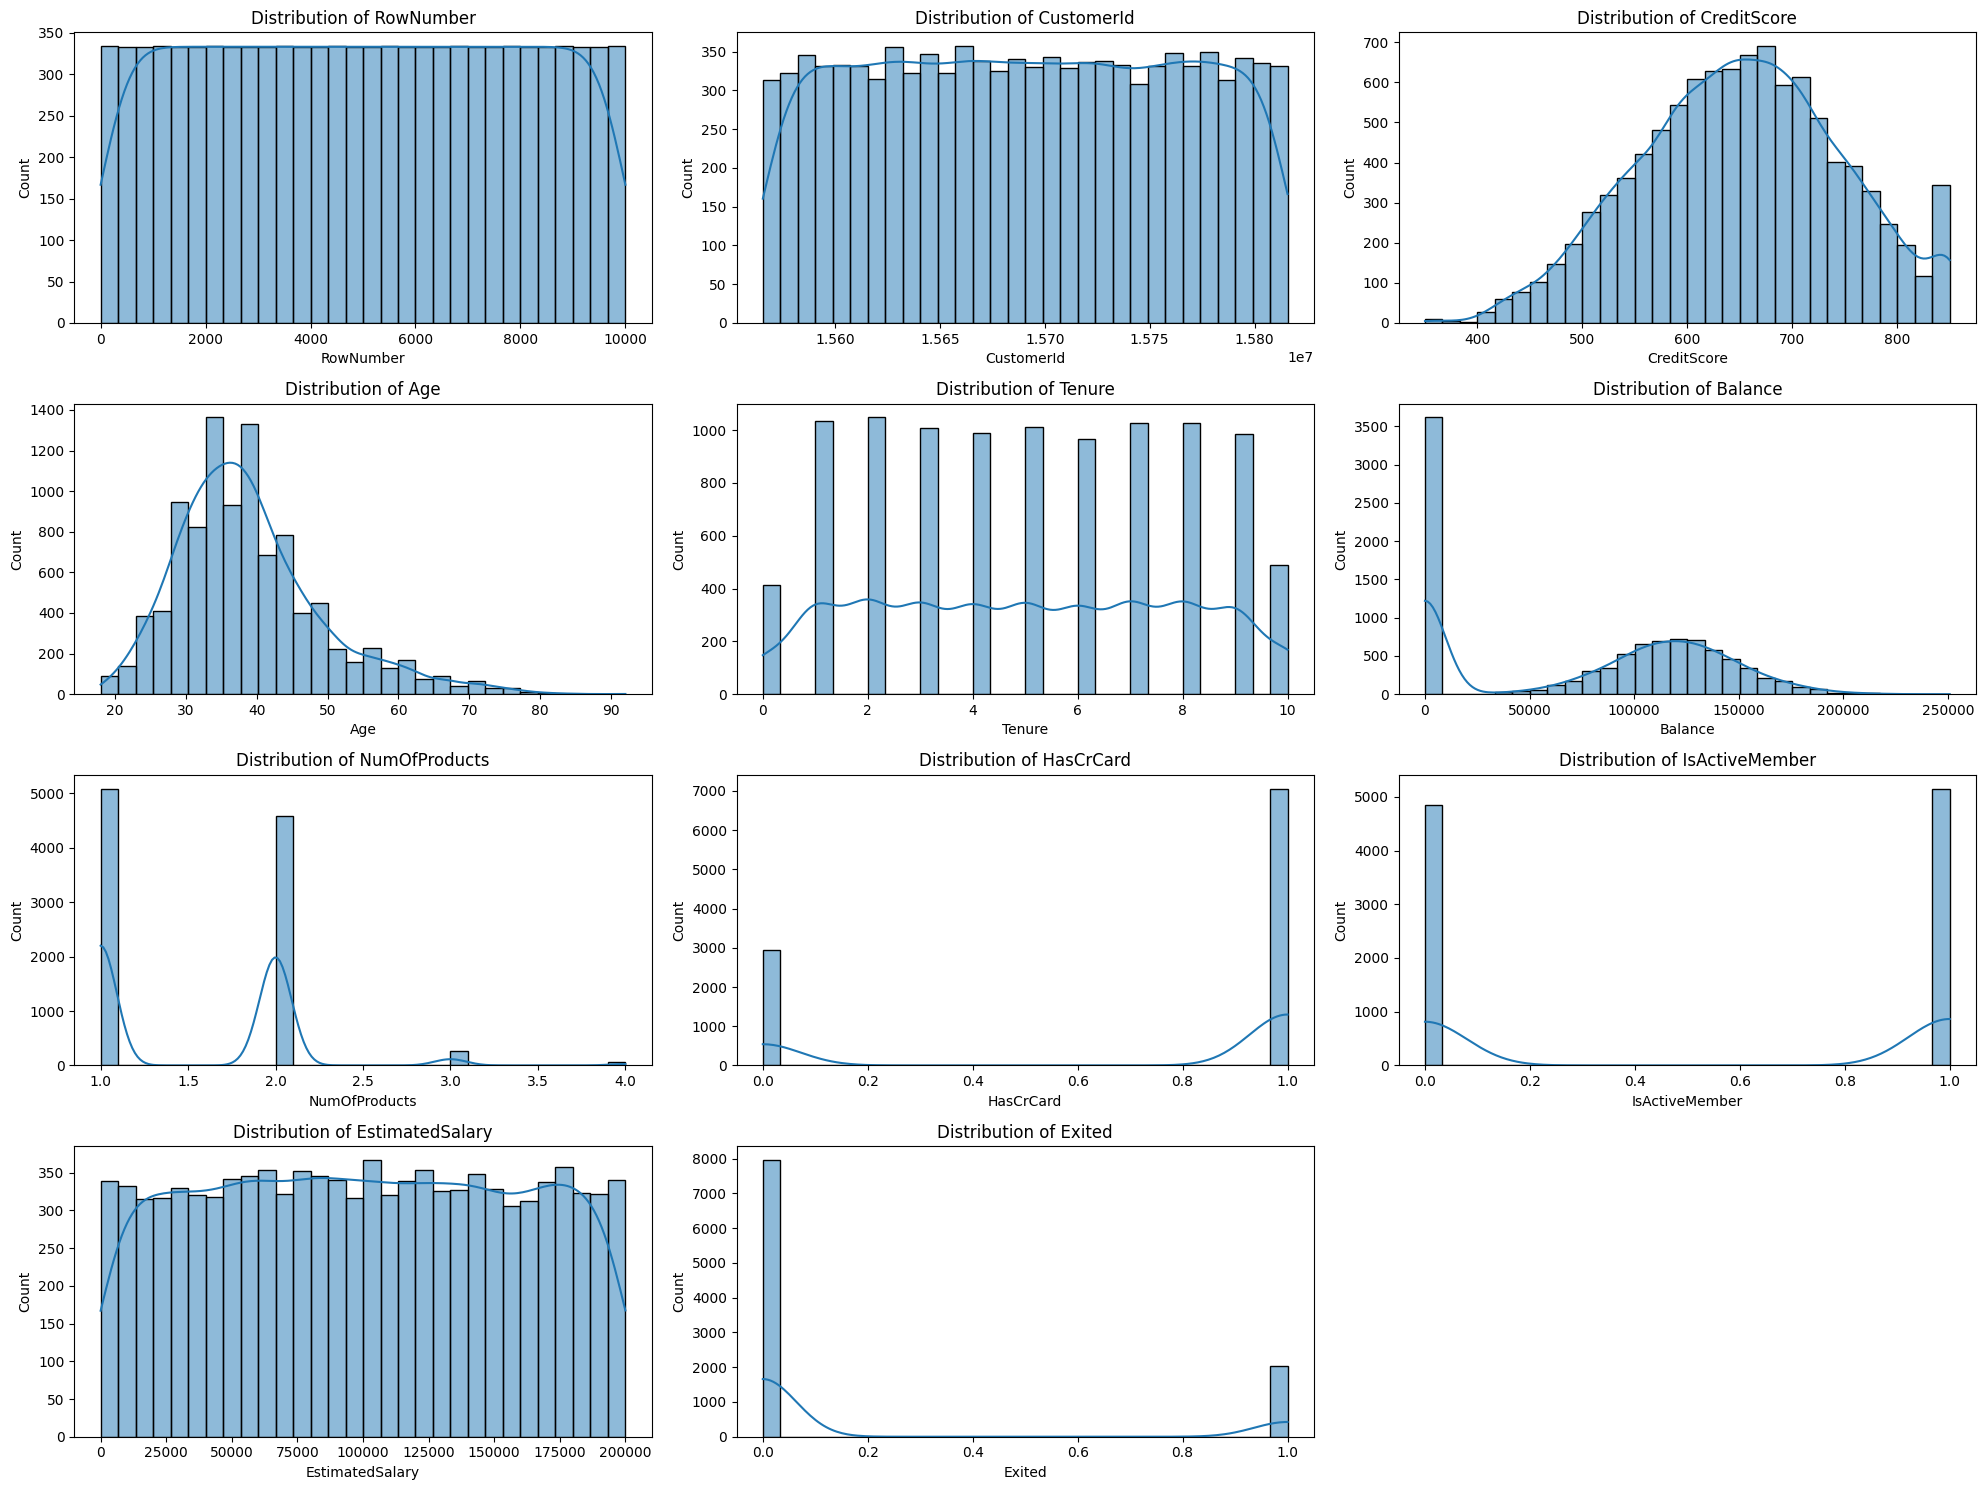

In [10]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Plotting value counts of categorical columns**

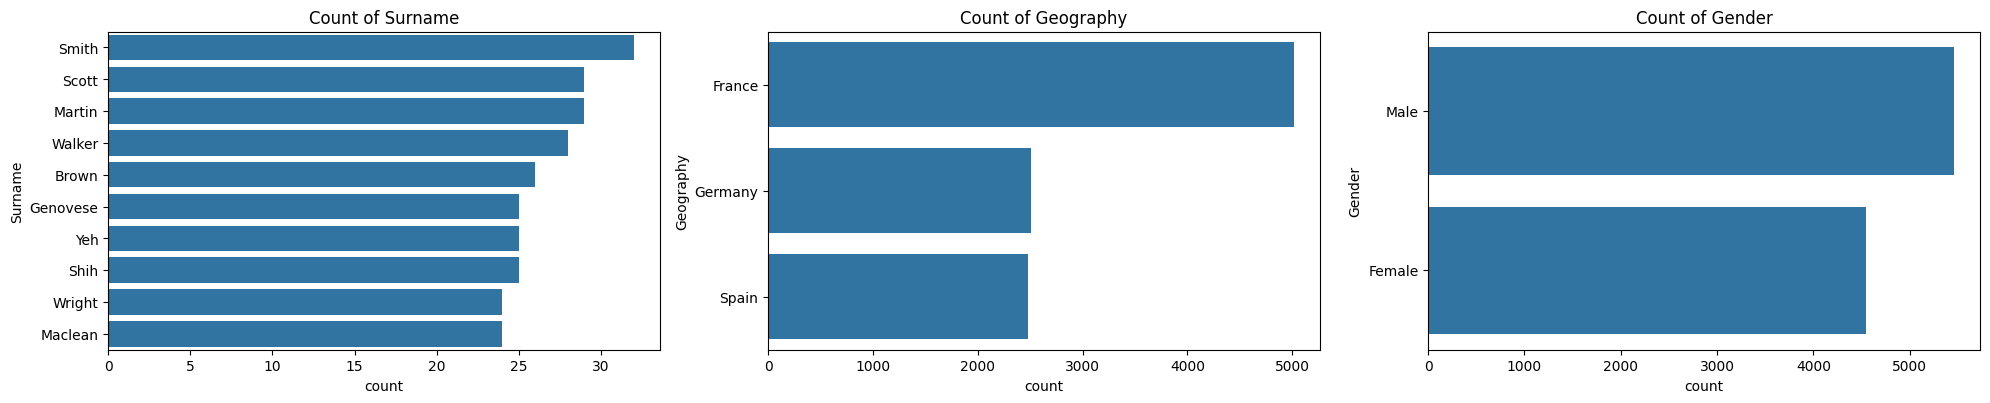

In [11]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

# **Bivariate Analysis**
**Numerical columns against target variable**

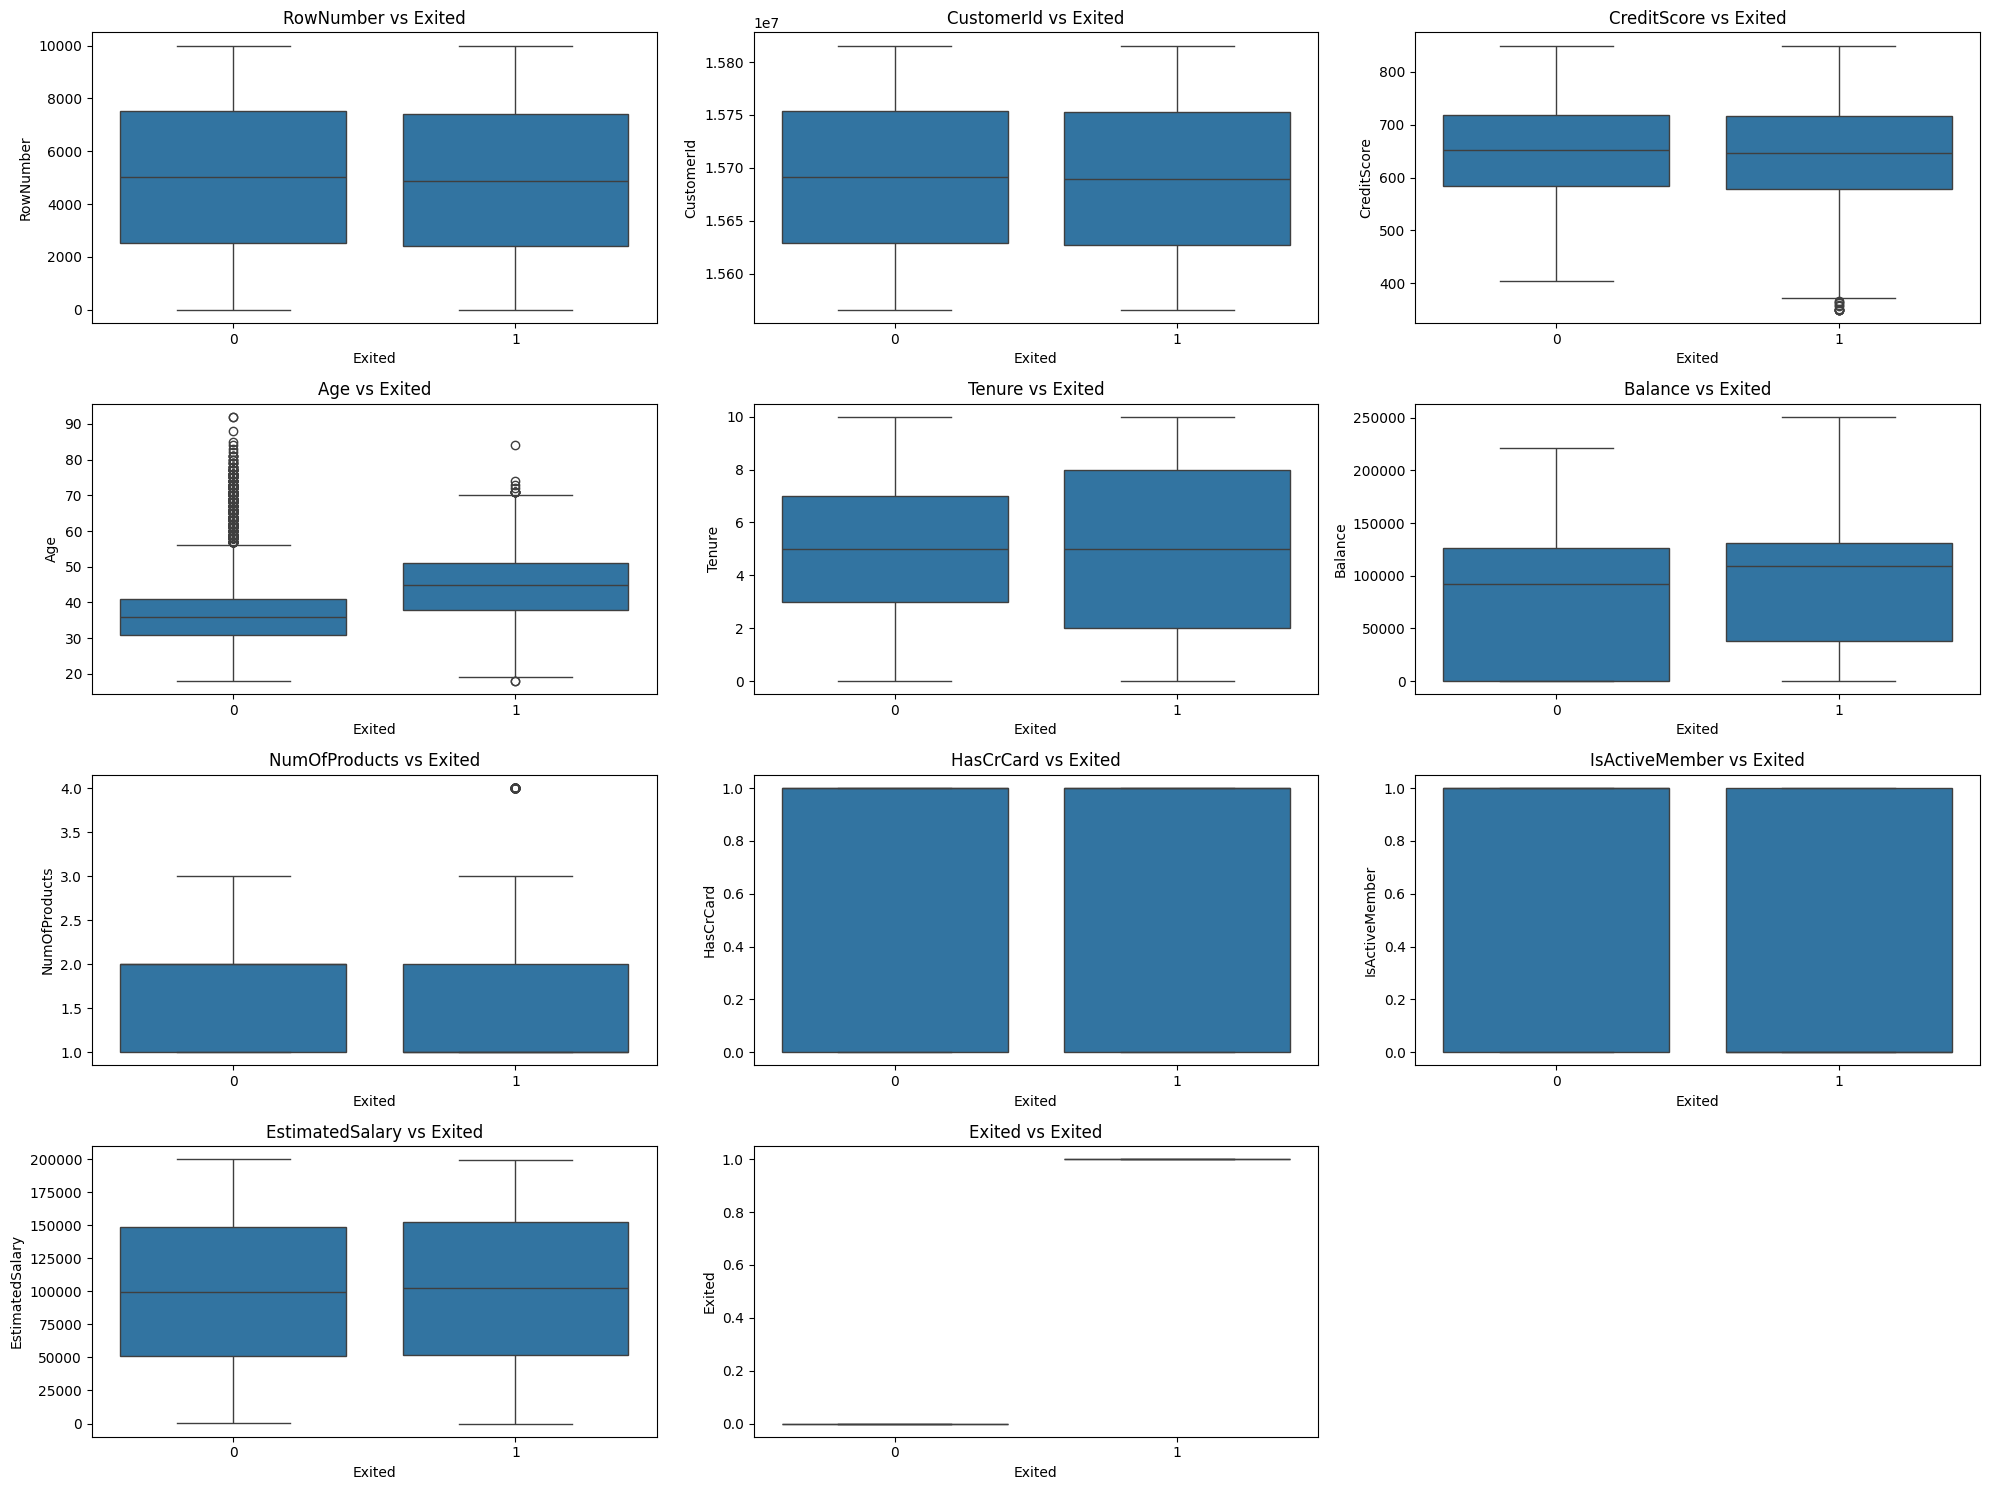

In [12]:
target = 'Exited'

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

**Categorical columns against target variable**

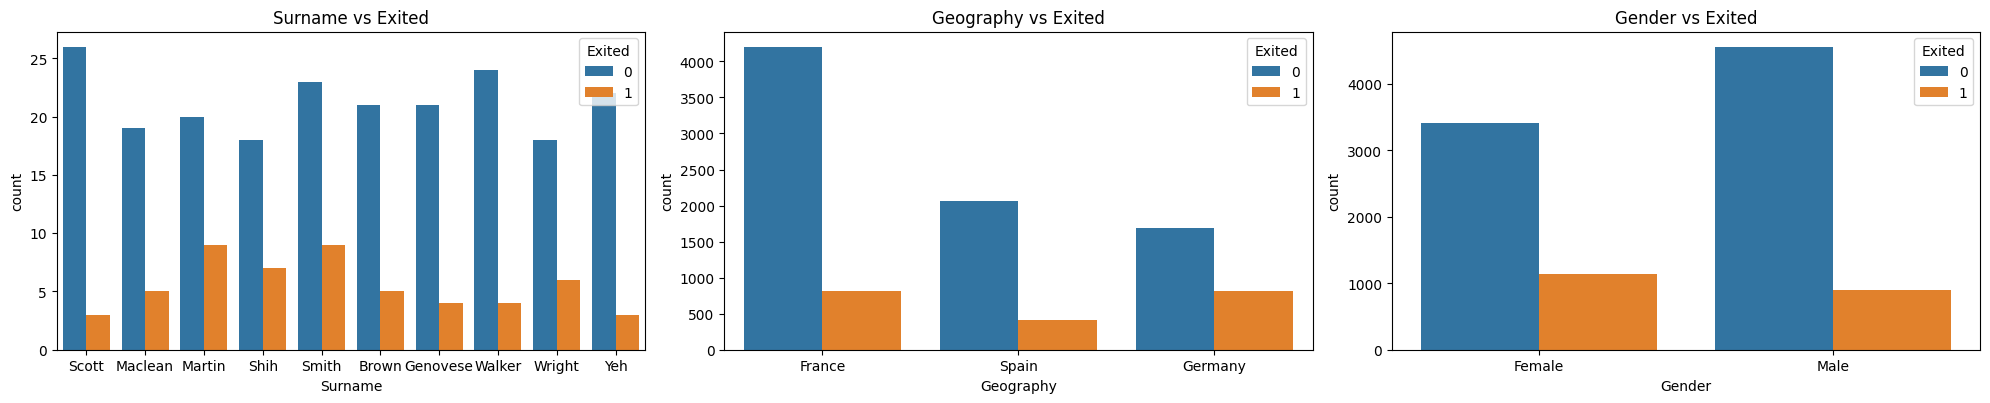

In [13]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, hue=target, data=df[df[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)
plt.tight_layout()
plt.show()

# **Multivariate Analysis**
**Pairplot for numerical columns**

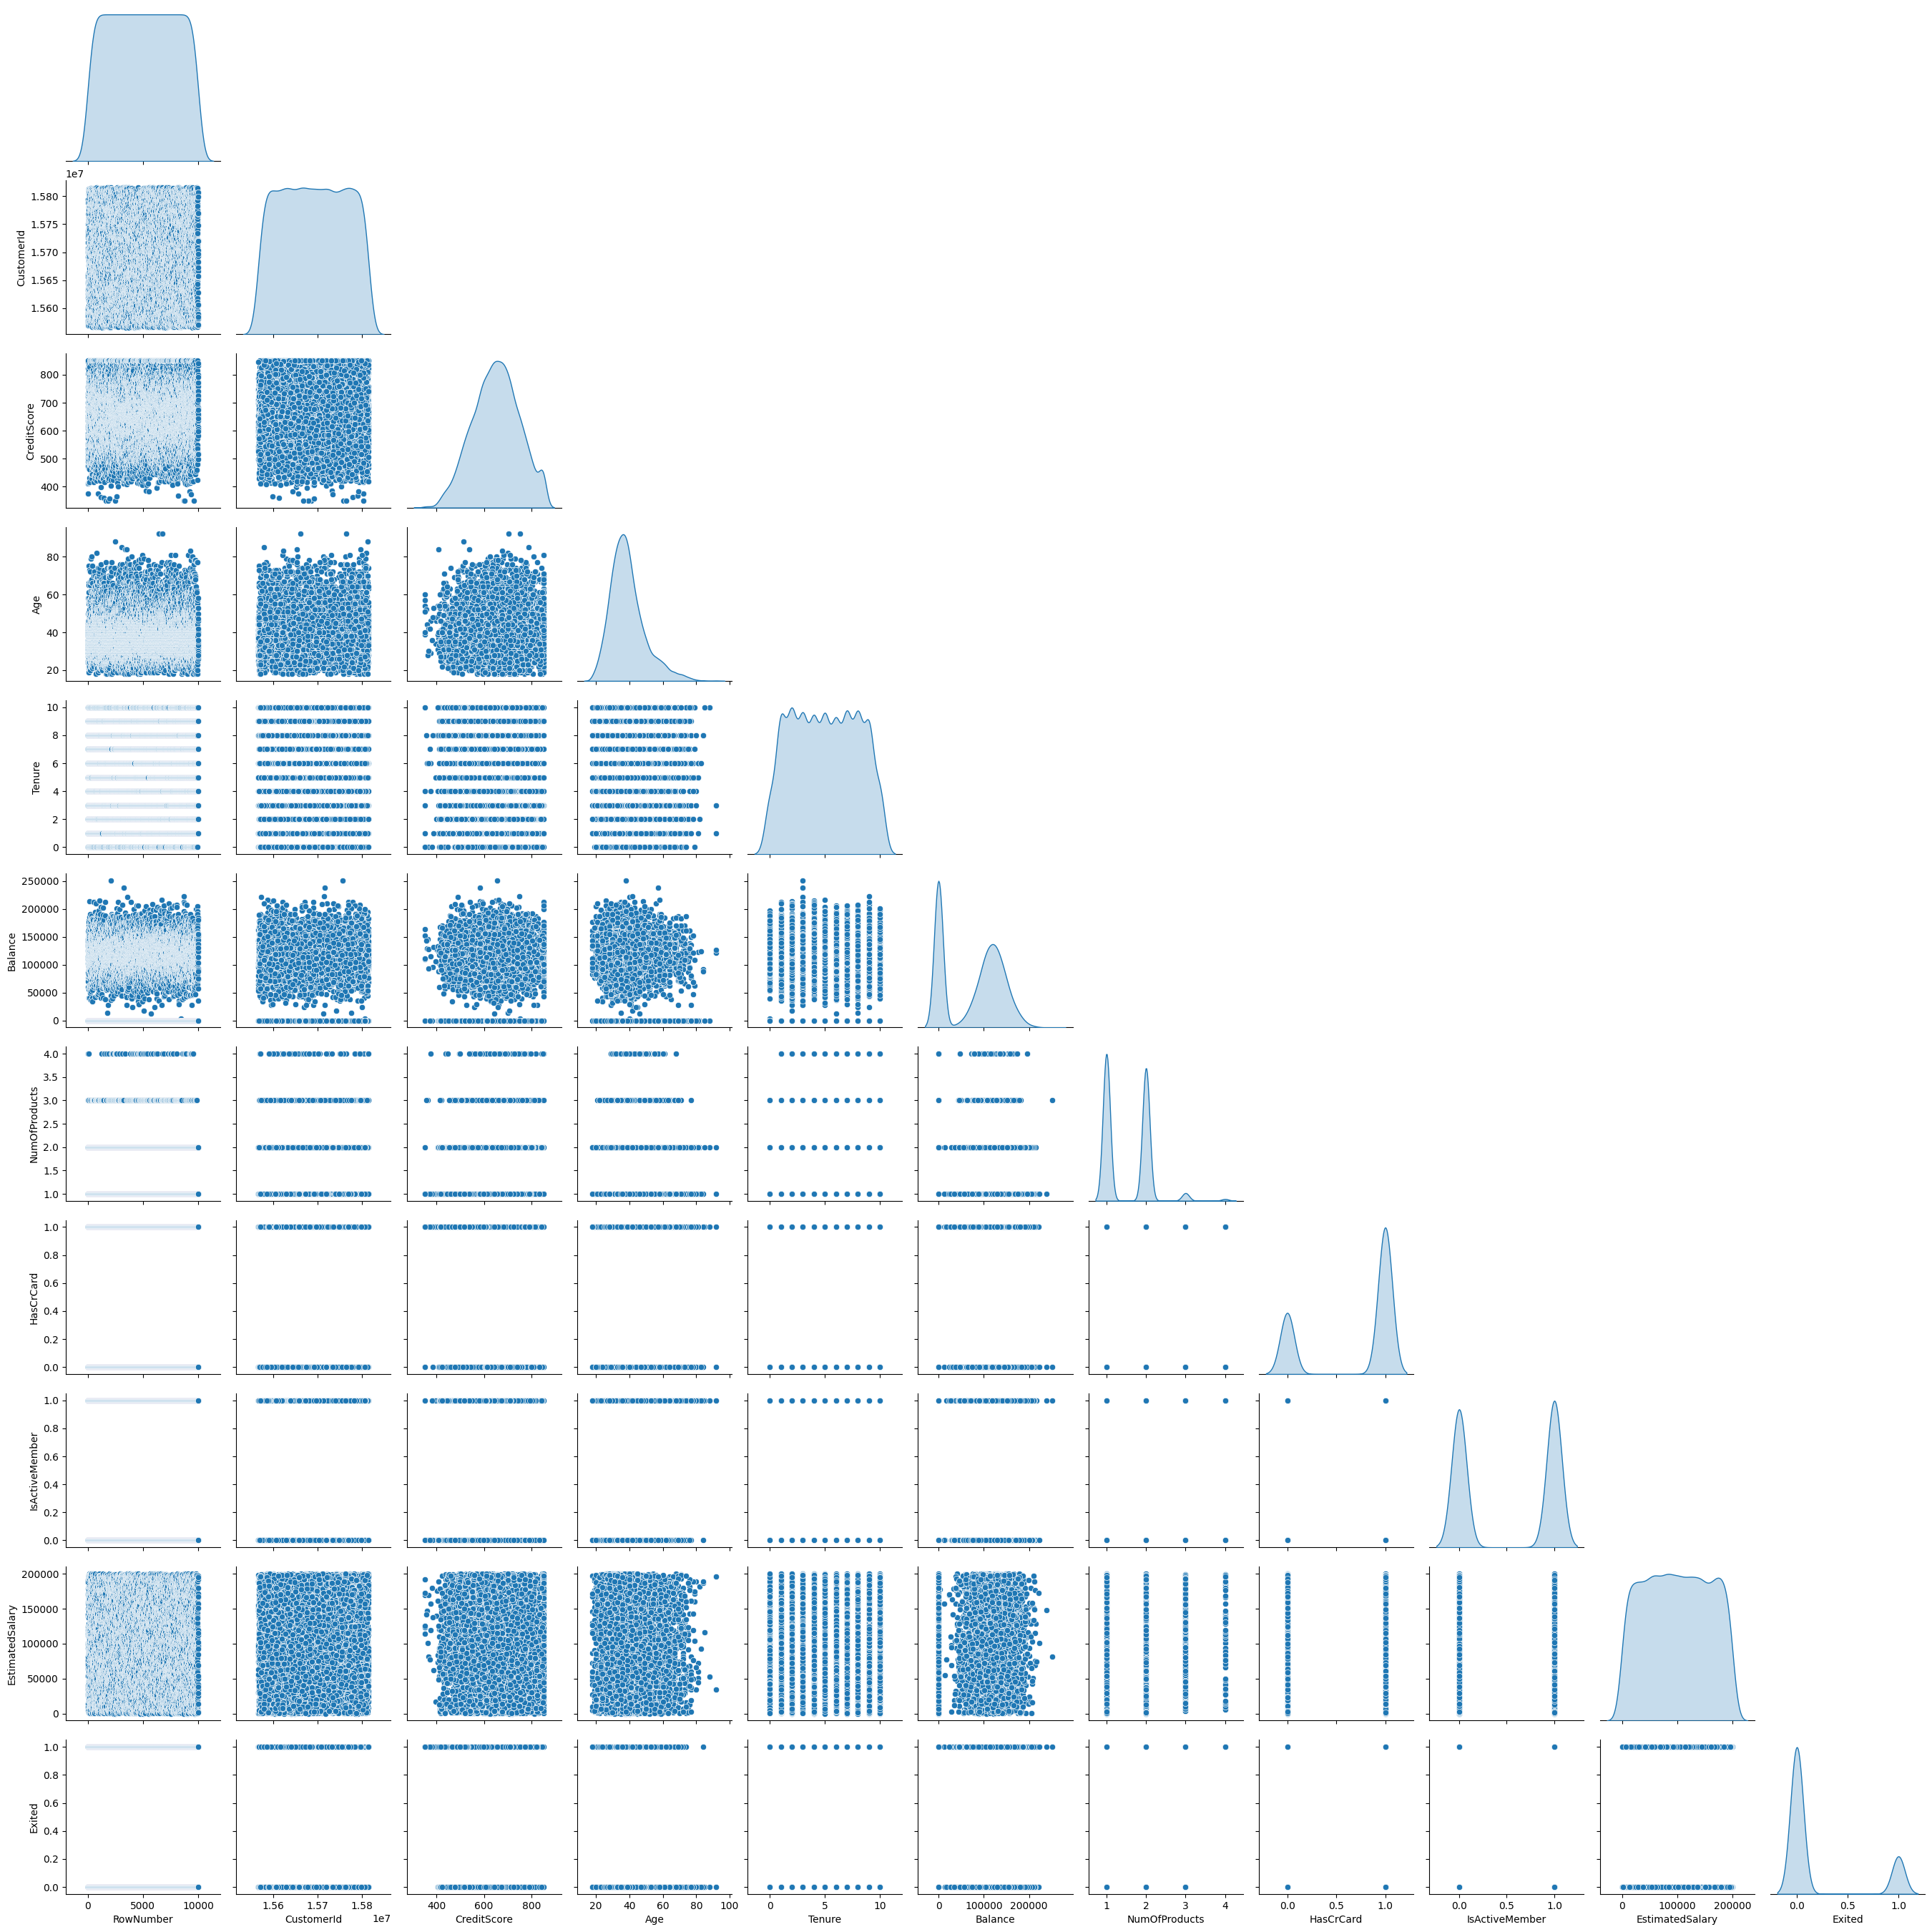

In [14]:
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.show()

**Scatter plots for some combinations of numerical variables**

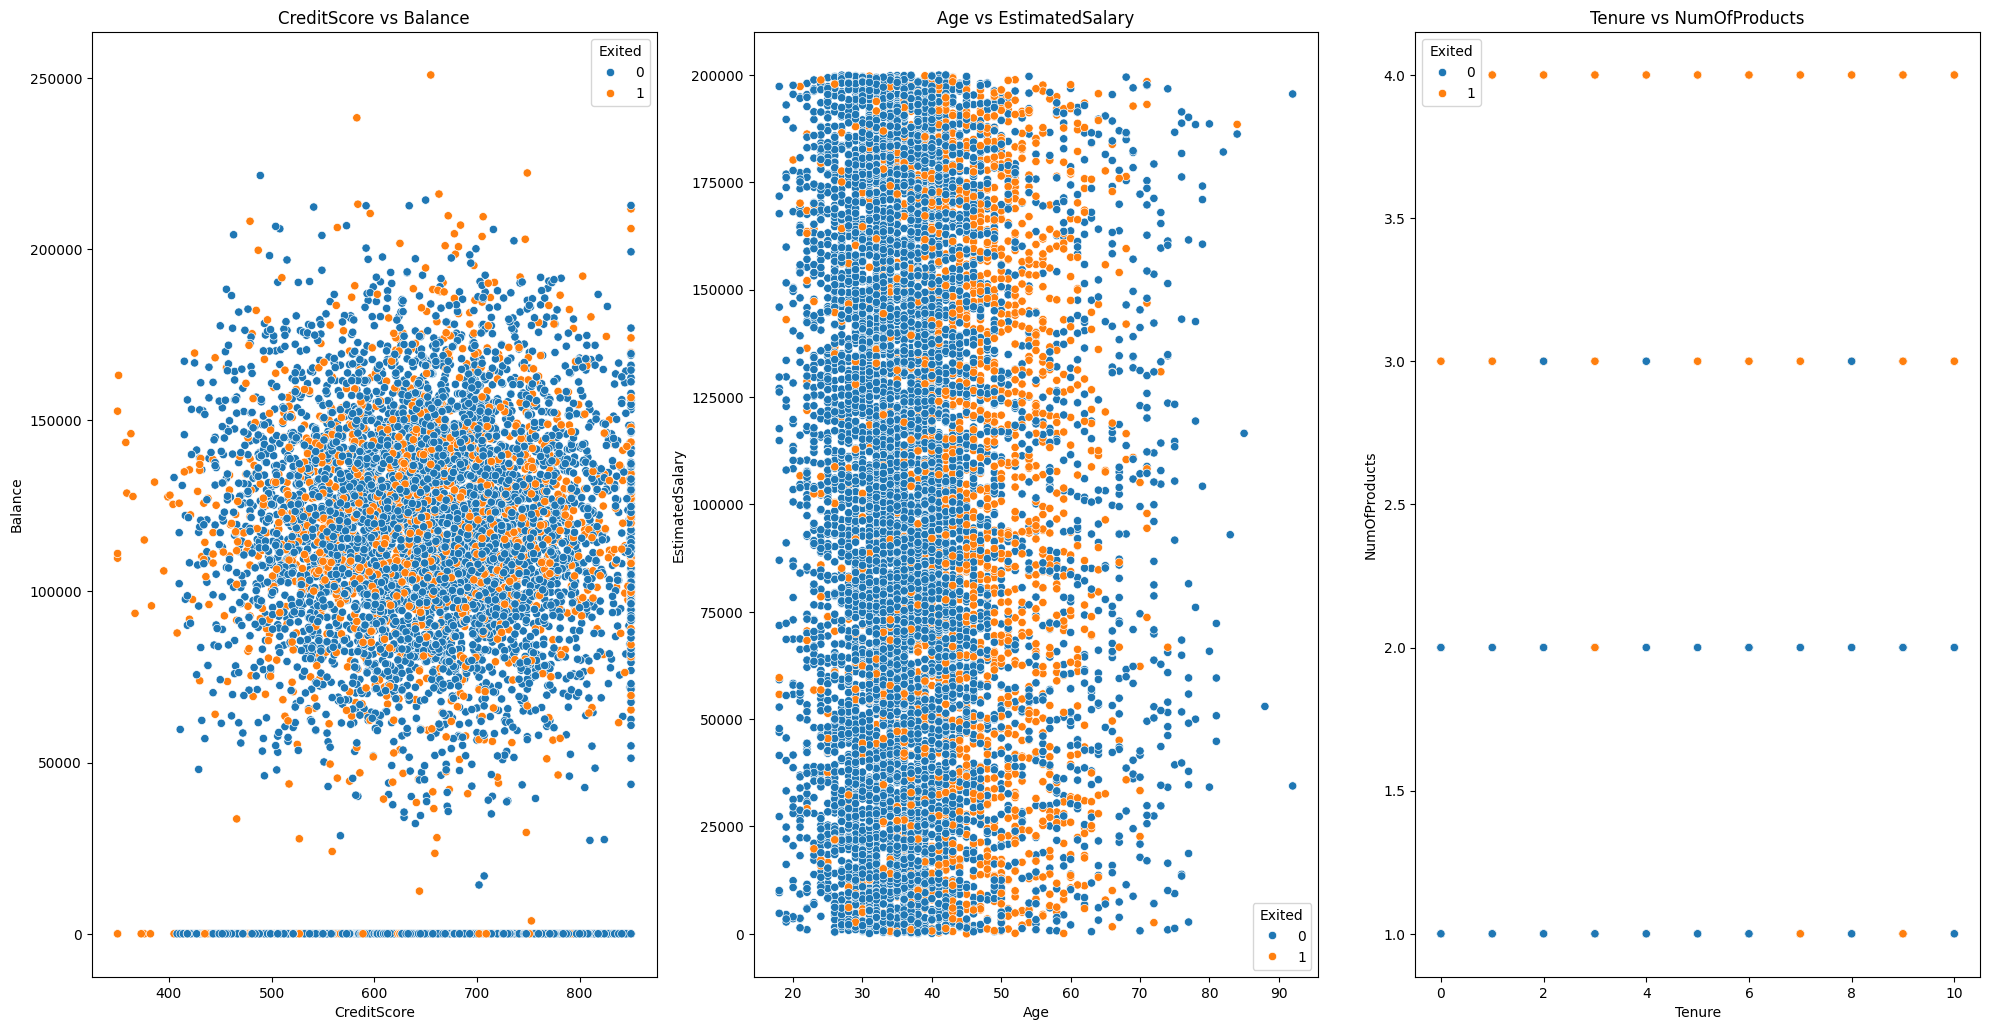

In [15]:
plt.figure(figsize=(20, 20))
pairs = [('CreditScore', 'Balance'), ('Age', 'EstimatedSalary'), ('Tenure', 'NumOfProducts')]
for i, (col1, col2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col1, y=col2, hue=target, data=df)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

# **Correlation Insights**

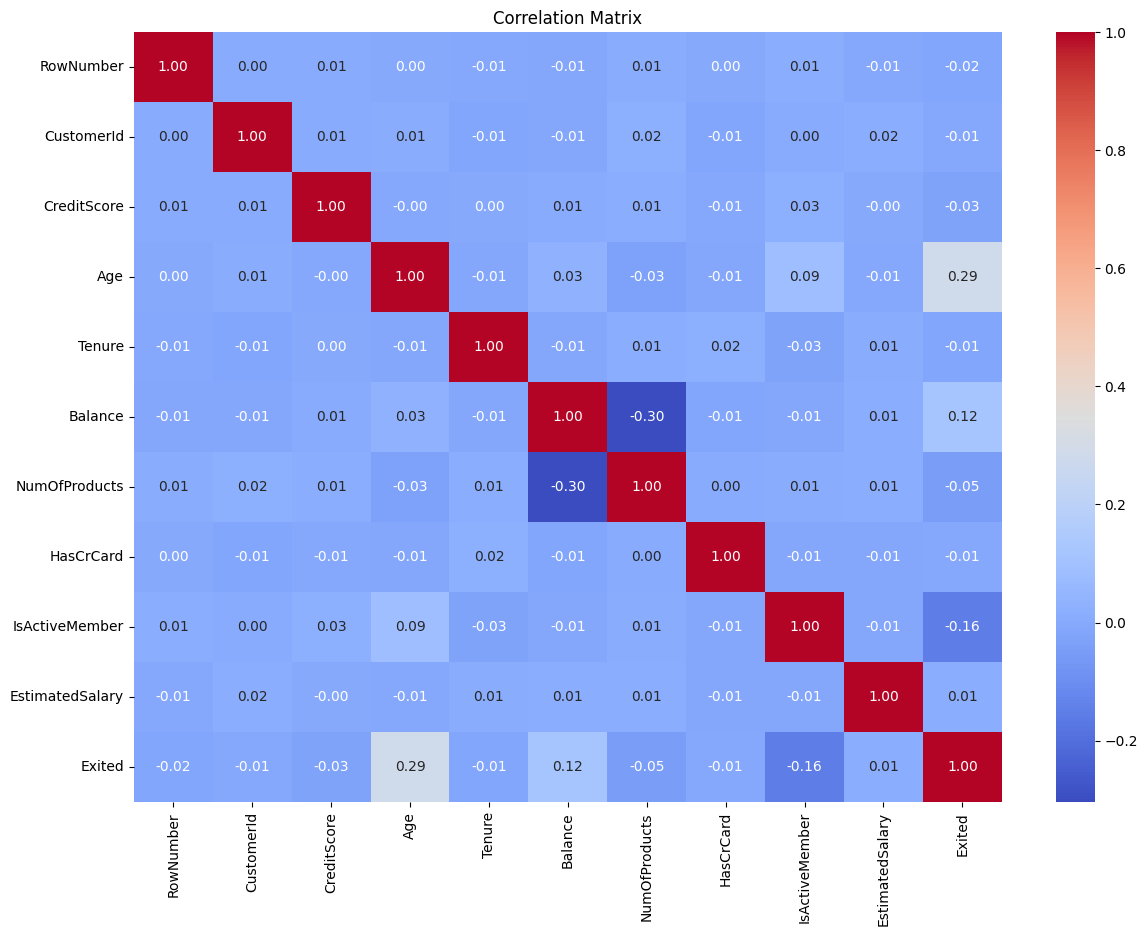

In [16]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Trend Observations**

/tmp/ipython-input-864395269.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df.groupby('AgeGroup')['Exited'].mean().reset_index()


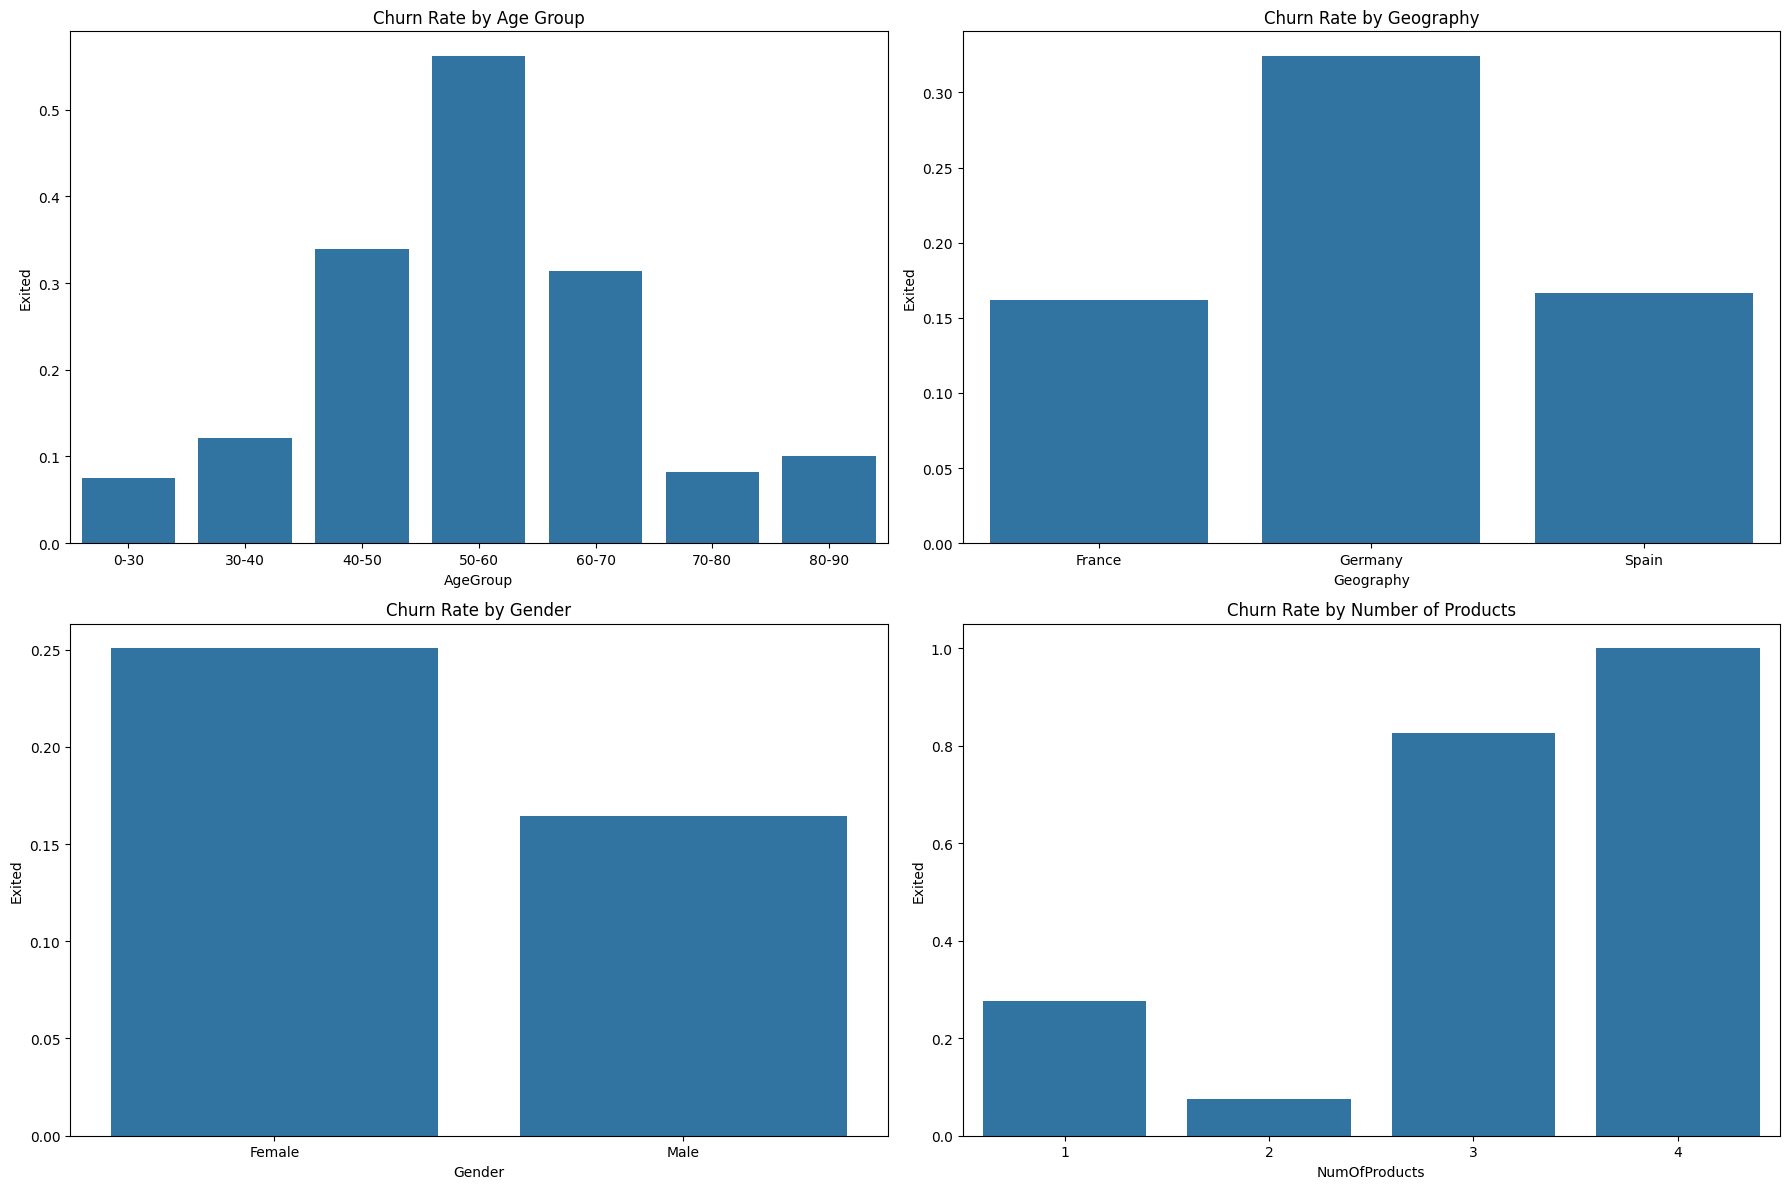

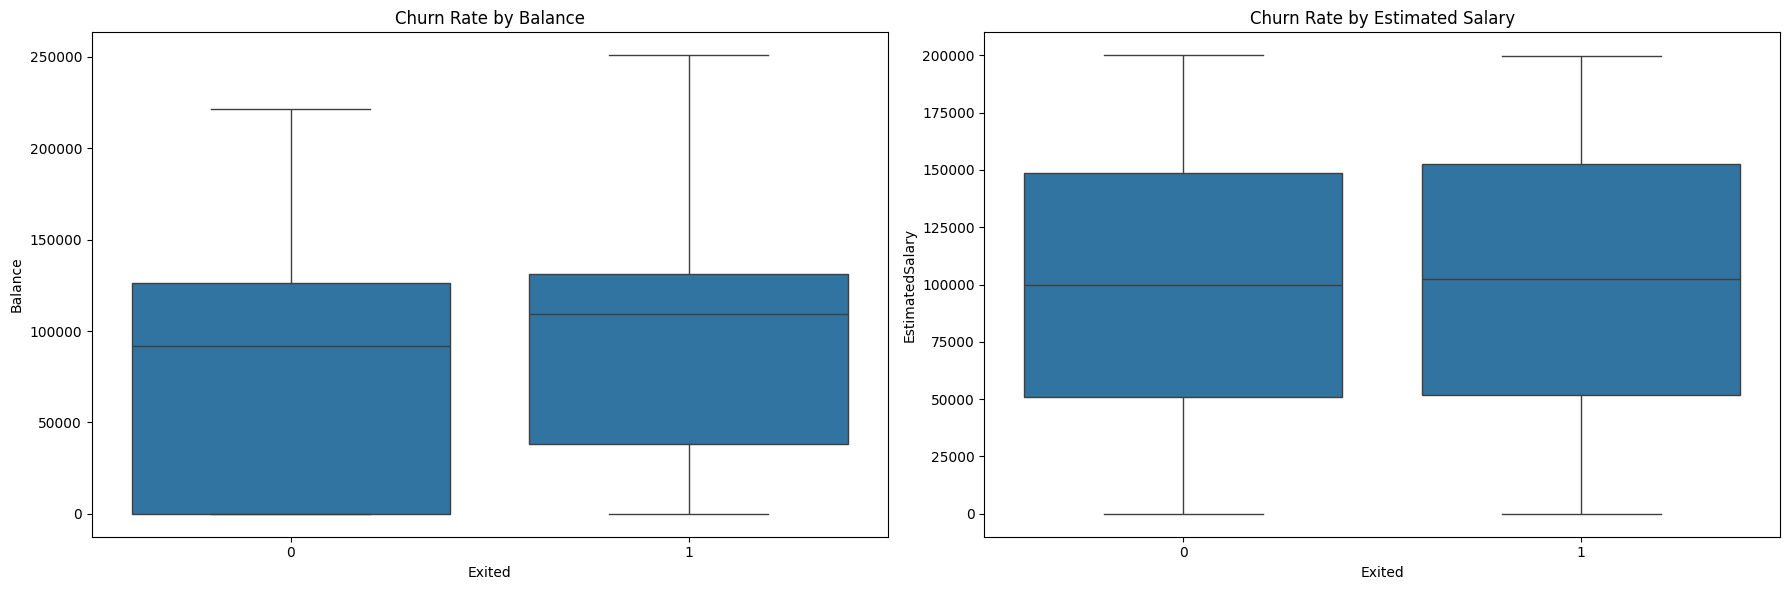

In [17]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

churn_by_age_group = df.groupby('AgeGroup')['Exited'].mean().reset_index()
churn_by_geography = df.groupby('Geography')['Exited'].mean().reset_index()
churn_by_gender = df.groupby('Gender')['Exited'].mean().reset_index()
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(data=churn_by_age_group, x='AgeGroup', y='Exited', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Age Group')

sns.barplot(data=churn_by_geography, x='Geography', y='Exited', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Geography')

sns.barplot(data=churn_by_gender, x='Gender', y='Exited', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Gender')

sns.barplot(data=churn_by_products, x='NumOfProducts', y='Exited', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Number of Products')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='Exited', y='Balance', ax=axes[0])
axes[0].set_title('Churn Rate by Balance')

sns.boxplot(data=df, x='Exited', y='EstimatedSalary', ax=axes[1])
axes[1].set_title('Churn Rate by Estimated Salary')

plt.tight_layout()
plt.show()

# **Outlier Management**
**Finding which columns have outliers**

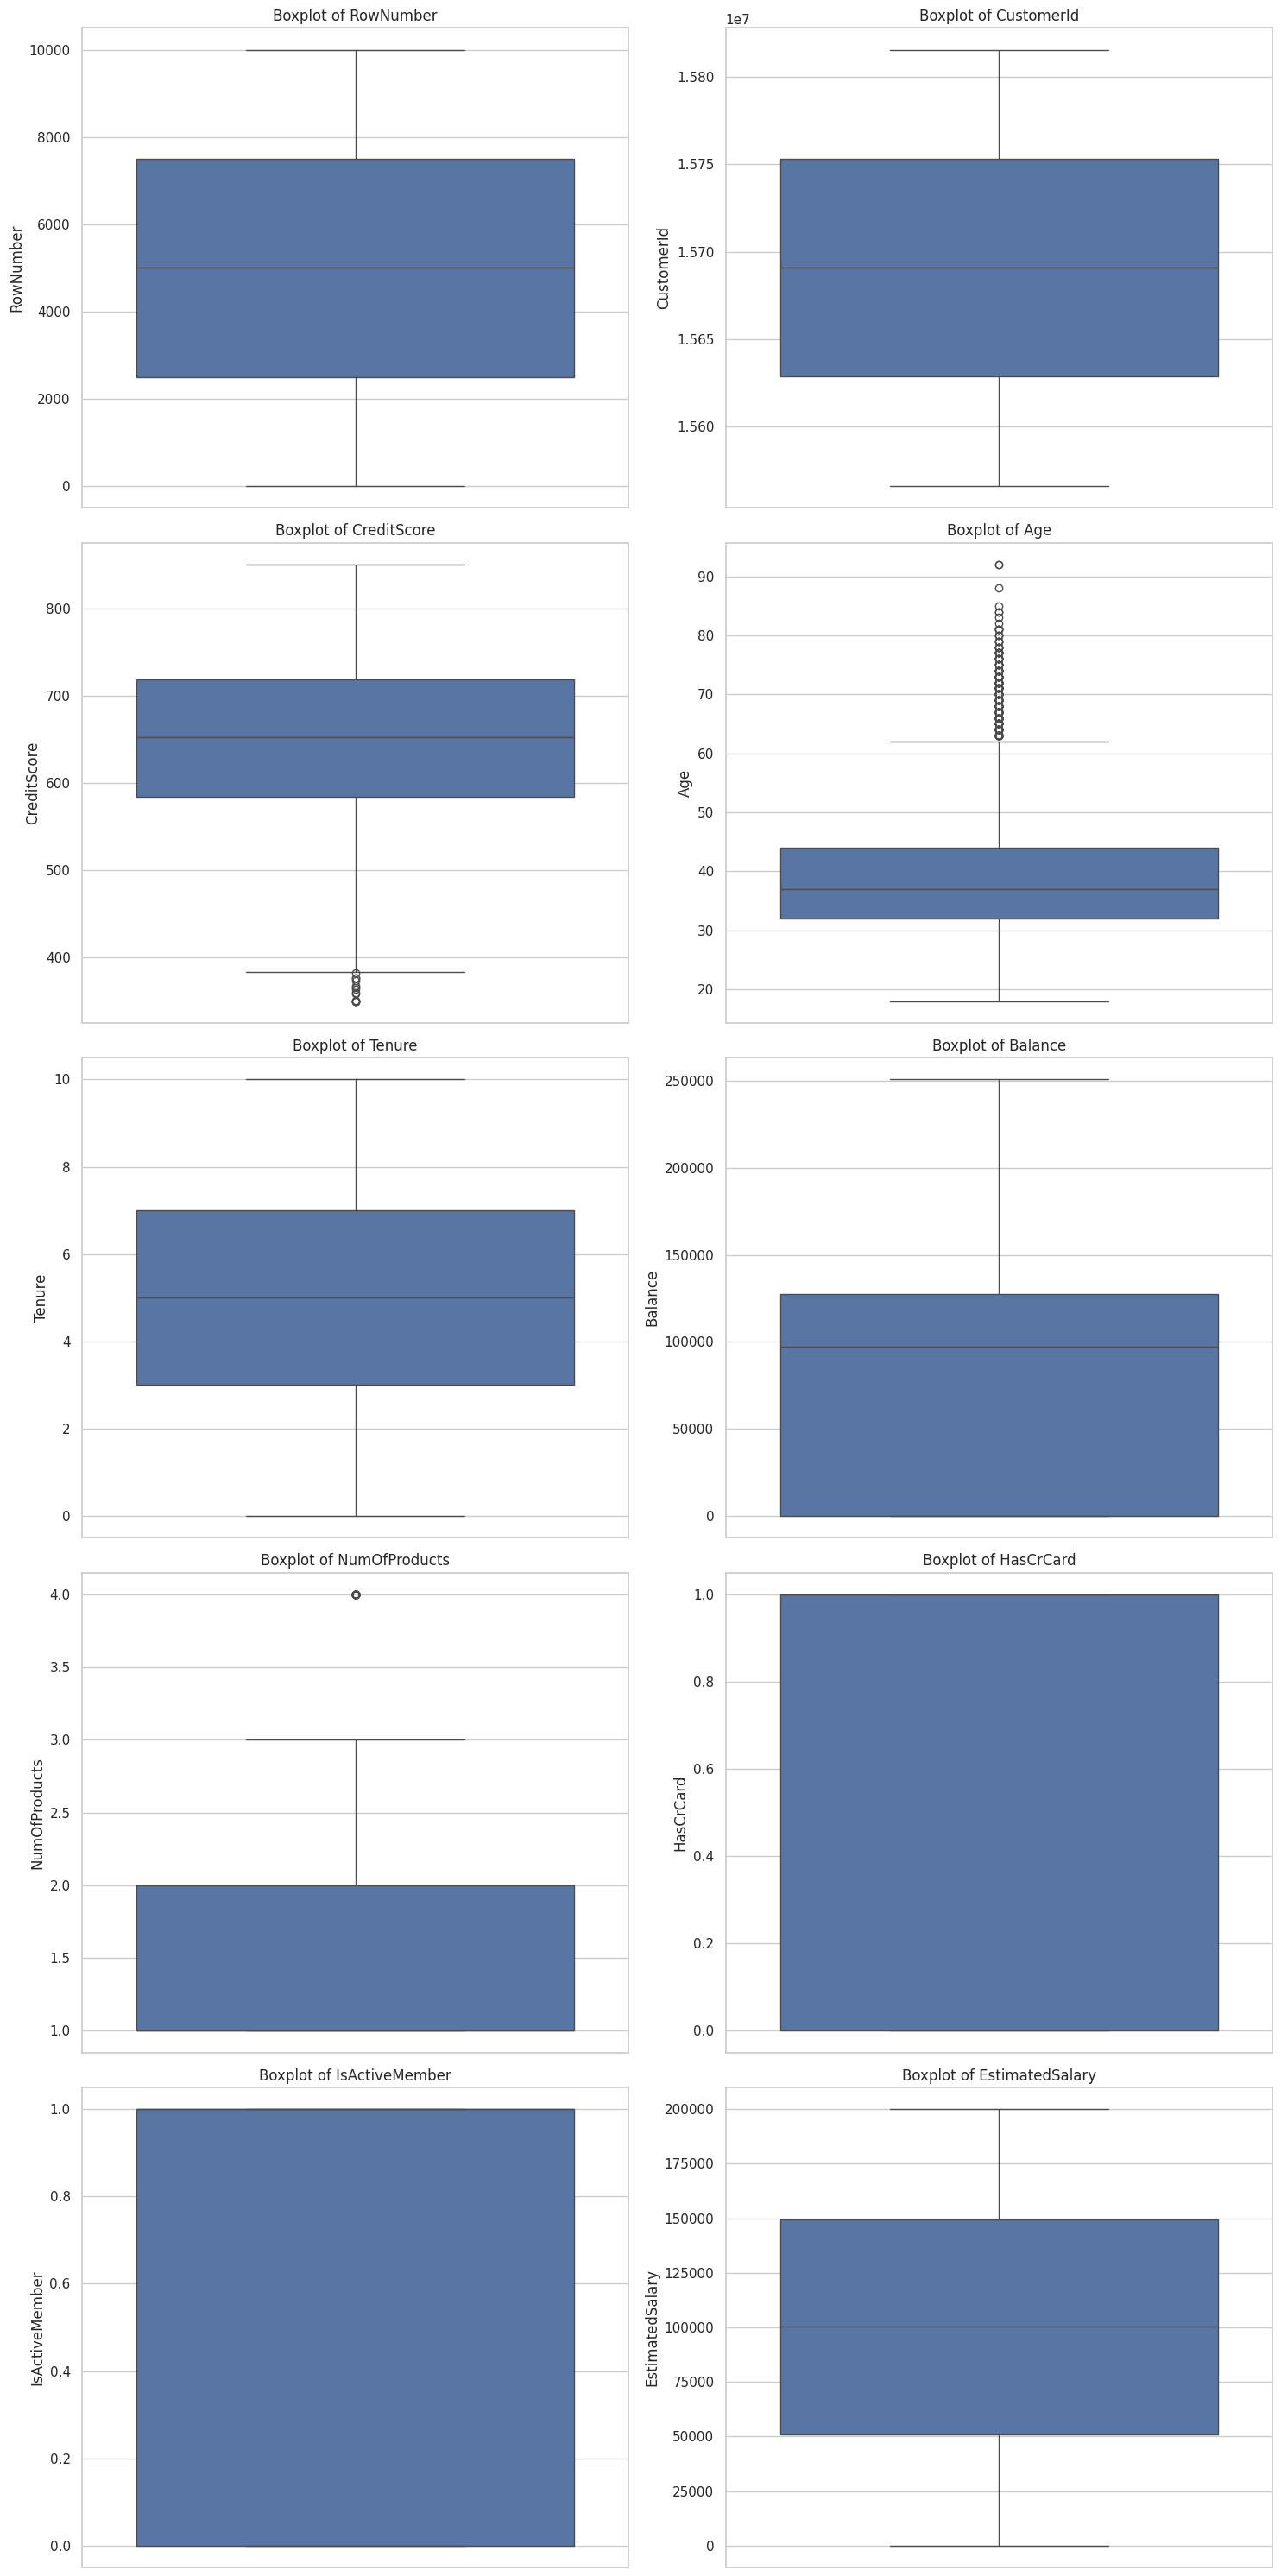

In [18]:
sns.set_theme(style="whitegrid")

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Exited')

fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Handling Outliers by Capping it with IQR Method**

In [19]:
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = np.delete(numeric_columns, np.where(numeric_columns == 'Exited'))

outlier_columns = []
for col in numeric_columns:
    capped_column = cap_outliers_iqr(df[col])
    if not capped_column.equals(df[col]):
        outlier_columns.append(col)
    df[col] = capped_column

**Checking Columns after Handling Outliers**

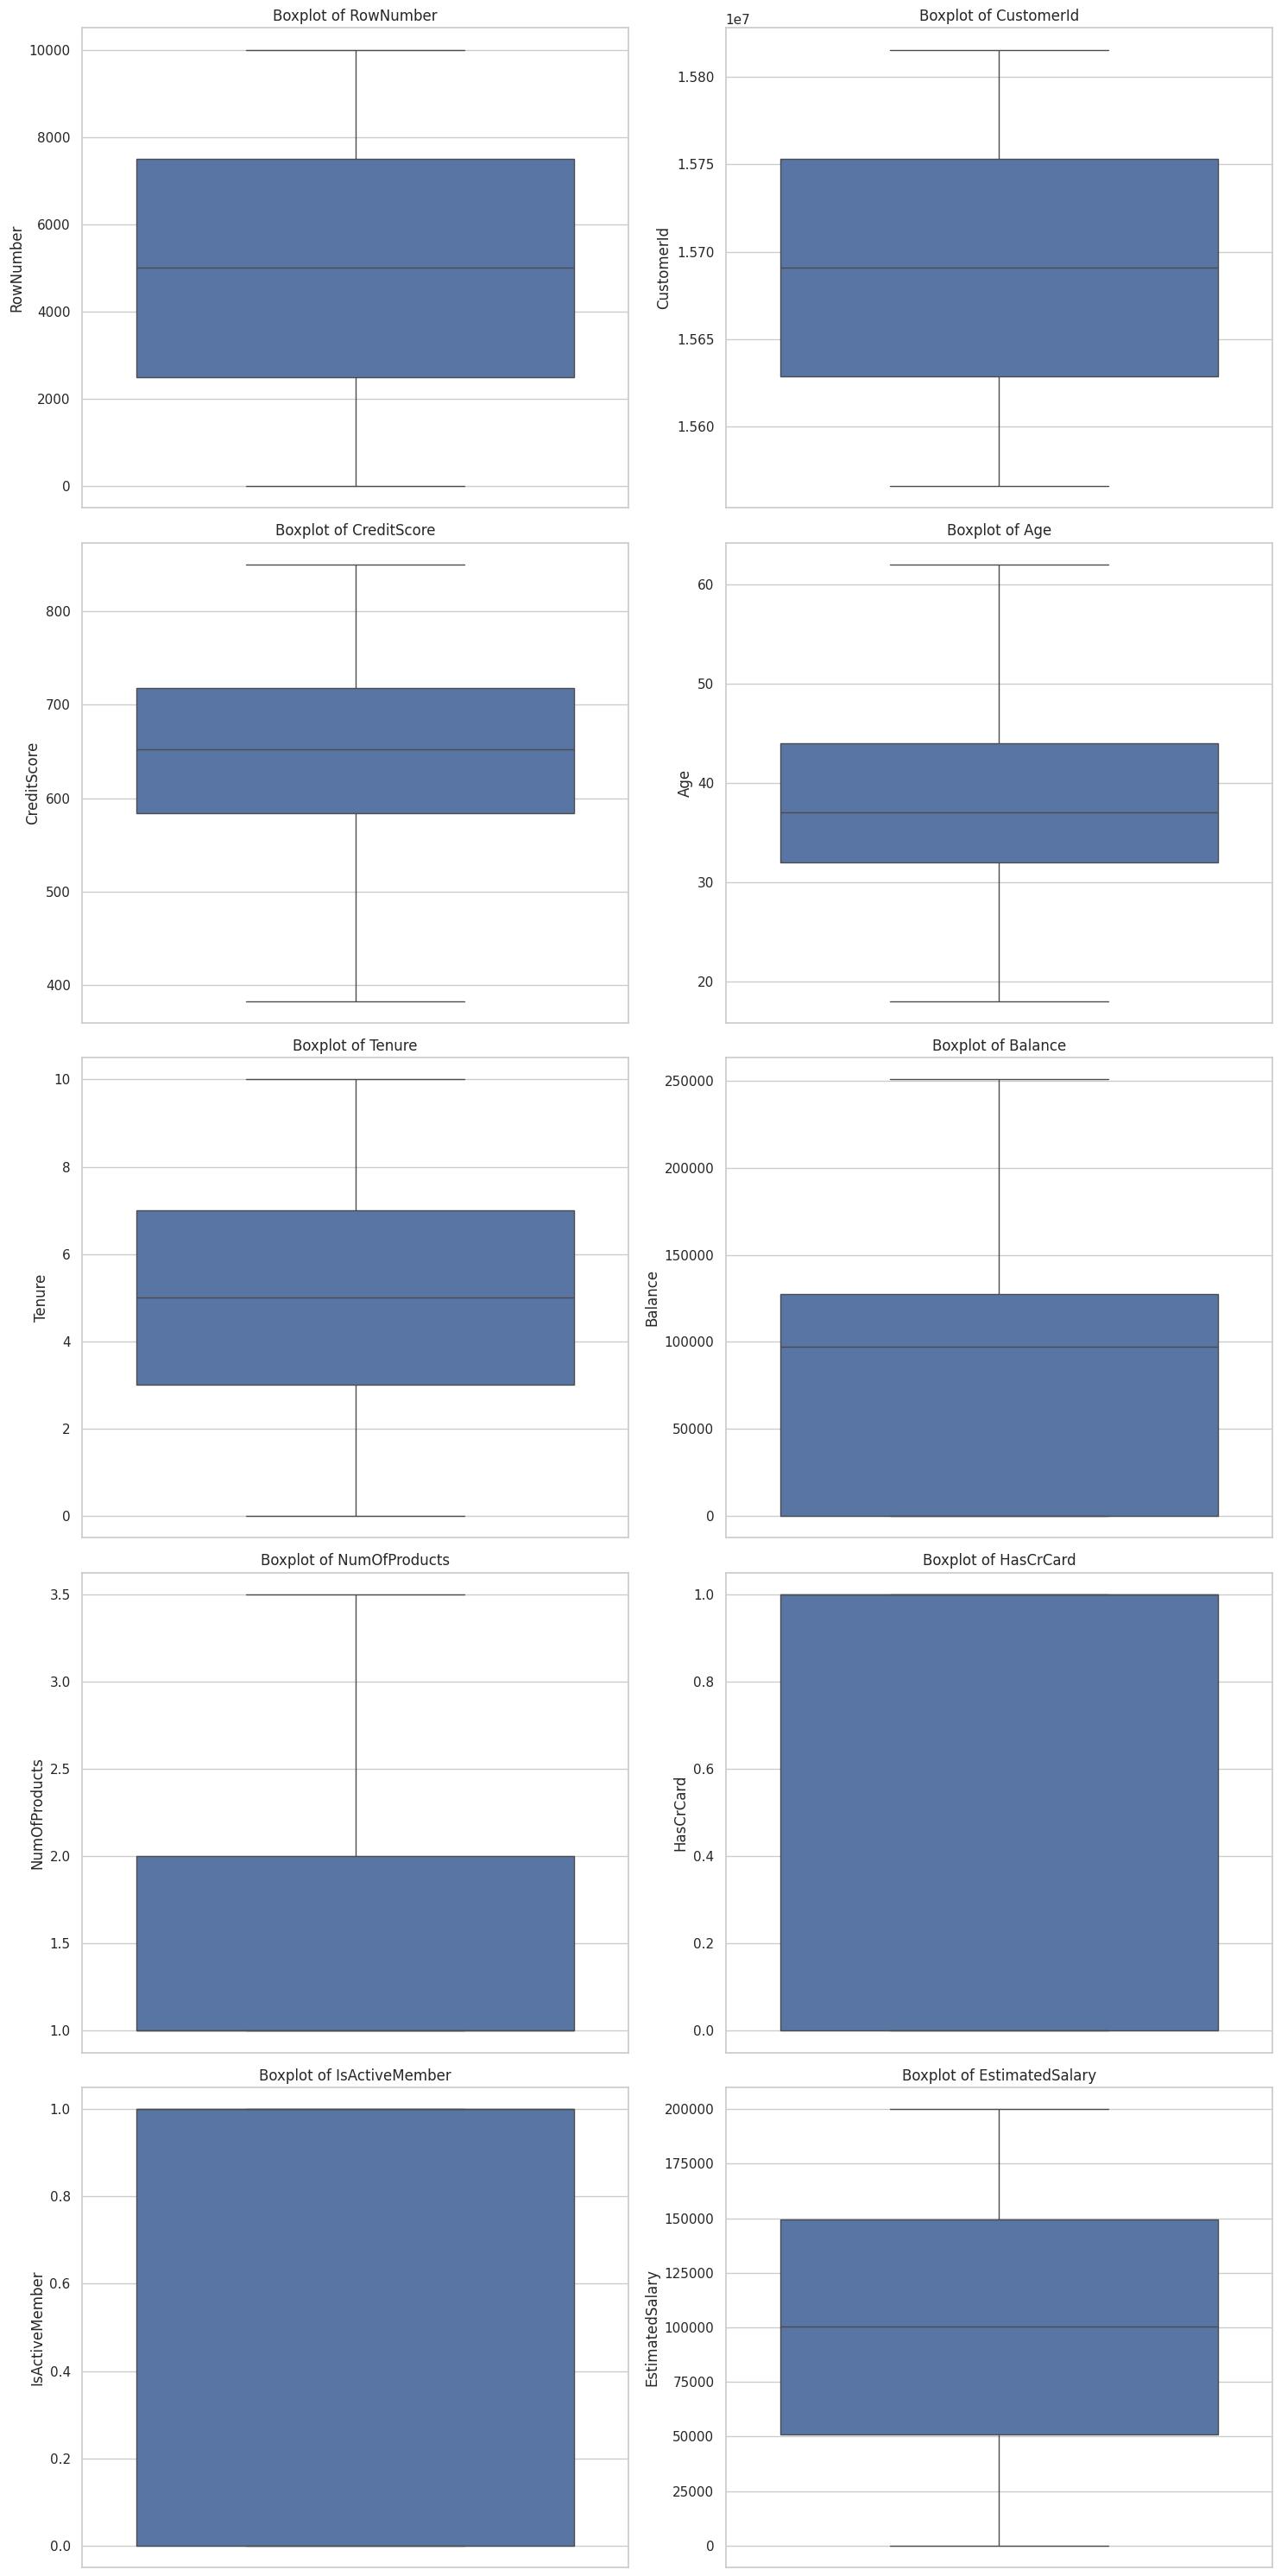

In [20]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [21]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0       2       0.00            1.0   
1        608.0     Spain  Female  41.0       1   83807.86            1.0   
2        502.0    France  Female  42.0       8  159660.80            3.0   
3        699.0    France  Female  39.0       1       0.00            2.0   
4        850.0     Spain  Female  43.0       2  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup  
0          1               1        101348.88       1    40-50  
1          0               1        112542.58       0    40-50  
2          1               0        113931.57       1    40-50  
3          0               0         93826.63       0    30-40  
4          1               1         79084.10       0    40-50

In [22]:
df.shape

(10000, 12)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']), df['Exited'],
                                                    test_size=0.2,
                                                    random_state=42)

In [24]:
X_train.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
9254        686.0    France    Male  32.0       6       0.00            2.0   
1561        632.0   Germany    Male  42.0       4  119624.60            2.0   
1670        559.0     Spain    Male  24.0       3  114739.92            1.0   
6087        561.0    France  Female  27.0       9  135637.00            1.0   
6669        517.0    France    Male  56.0       9  142147.32            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary AgeGroup  
9254          1               1        179093.26    30-40  
1561          1               1        195978.86    40-50  
1670          1               0         85891.02     0-30  
6087          1               0        153080.40     0-30  
6669          0               0         39488.04    50-60

In [25]:
numerical_columns = [0, 3, 4, 5, 6, 7, 8, 9]
nominal_columns = [1, 2]
ordinal_columns = [10]

In [26]:
handle_numerical = Pipeline(steps=[
    ('impyte', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

In [27]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

In [28]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [29]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('ordinal', handle_ordinal, ordinal_columns),
    ('nominal', handle_nominal, nominal_columns)
], remainder='passthrough')

# **Balancing the Scales: Handling Data Imbalance**

In [30]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [31]:
adasyn = ADASYN(random_state=42)

In [32]:
pipe_adasyn = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('smote', adasyn)])

In [33]:
X_train_resampled, y_train_resampled = pipe_adasyn.fit_resample(X_train, y_train)

In [34]:
X_test_preprocessed = pipe_adasyn.named_steps['preprocessing'].transform(X_test)

# **Model Deployment & Evaluation**

**Decision Tree**

In [35]:
class_weights = {0: 1, 1: 3}

In [36]:
model_dt = DecisionTreeClassifier(class_weight=class_weights)
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight={0: 1, 1: 3})

In [37]:
y_pred_dt = model_dt.predict(X_test_preprocessed)

In [38]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.77      2000
   macro avg       0.65      0.67      0.66      2000
weighted avg       0.79      0.77      0.78      2000



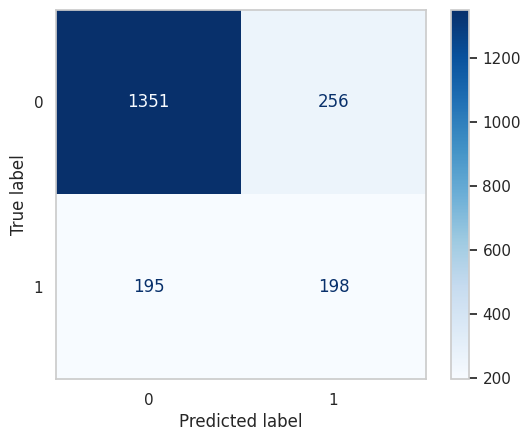

In [39]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))
cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.show()

**Random Forest**

In [40]:
model_rf = RandomForestClassifier()

In [41]:
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [42]:
y_pred_rf = model_rf.predict(X_test_preprocessed)

In [43]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



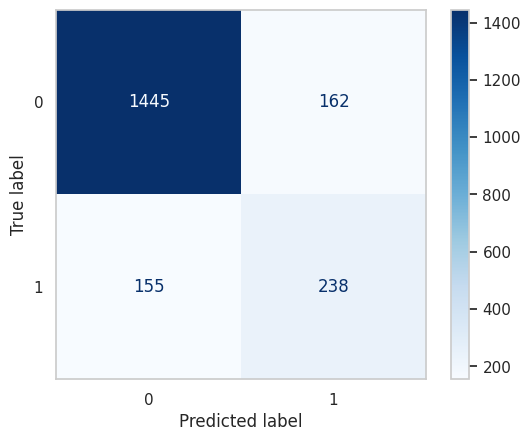

In [44]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))
cm = confusion_matrix(y_test, y_pred_rf, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.show()

**SVC Model**

In [45]:
model_svc = SVC()

In [46]:
model_svc.fit(X_train_resampled, y_train_resampled)

SVC()

In [47]:
y_pred_svc = model_svc.predict(X_test_preprocessed)

In [48]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1607
           1       0.39      0.80      0.53       393

    accuracy                           0.72      2000
   macro avg       0.66      0.75      0.66      2000
weighted avg       0.83      0.72      0.74      2000



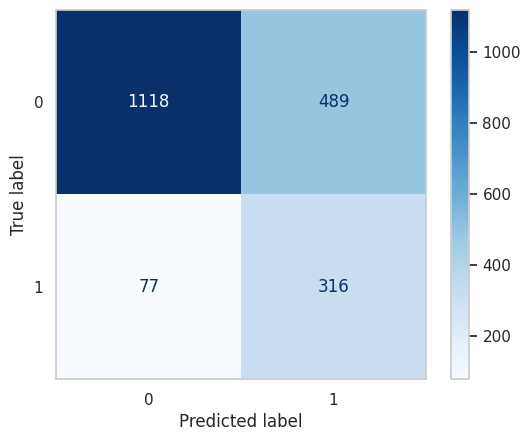

In [49]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))
cm = confusion_matrix(y_test, y_pred_svc, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.show()

 **KNN Model**

In [50]:
model_knn = KNeighborsClassifier(n_neighbors=5)


In [51]:
model_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [52]:
y_pred_knn = model_knn.predict(X_test_preprocessed)

In [53]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.69      0.49       393

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



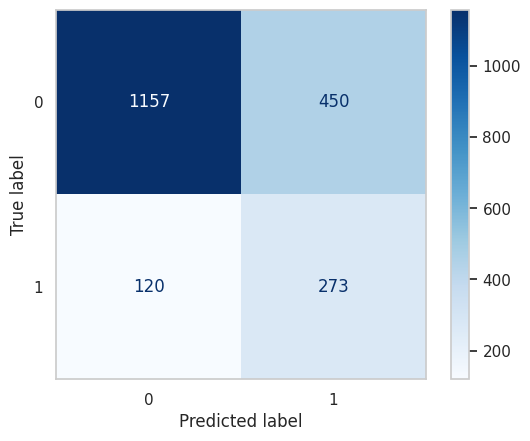

In [54]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))
cm = confusion_matrix(y_test, y_pred_knn, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.show()

**XGBoost Classifier**

In [55]:
model_xgboost = XGBClassifier()

In [56]:
model_xgboost.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_pred_xgb = model_xgboost.predict(X_test_preprocessed)

In [58]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.65      0.56      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



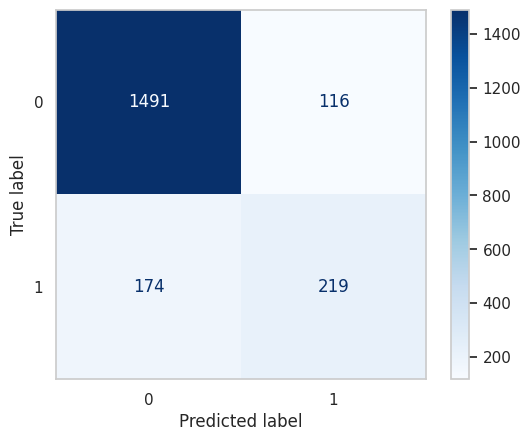

In [59]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))
cm = confusion_matrix(y_test, y_pred_xgb, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.show()

**Voting Classifier**

In [60]:
voting = VotingClassifier(estimators=[
    ('dt', model_dt),
    ('rf', model_rf),
    ('svc', model_svc),
    ('knn', model_knn),
    ('xgb', model_xgboost)
])

In [61]:
voting.fit(X_train_resampled, y_train_resampled)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 3})),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [62]:
y_pred_vote = voting.predict(X_test_preprocessed)

In [63]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.64      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000



Accuracy: 0.7375
Precision: 0.4166666666666667
Recall: 0.7248157248157249
F1: 0.5291479820627802
ROC-AUC: 0.7998321896626981

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1593
           1       0.42      0.72      0.53       407

    accuracy                           0.74      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.74      0.76      2000


Confusion Matrix:
 [[1180  413]
 [ 112  295]]


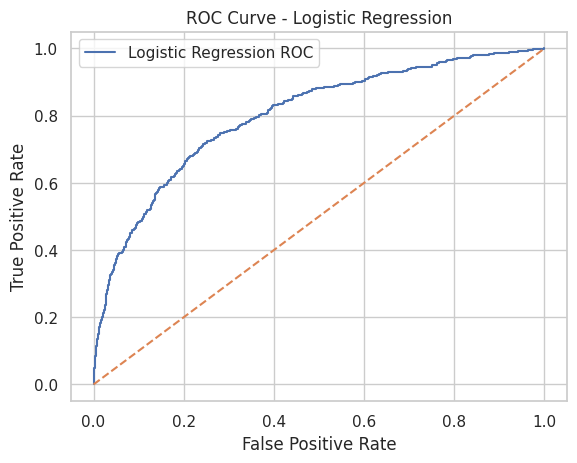

In [66]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Infer the working DataFrame and target column
# Expecting a DataFrame named df. If not, try common names.
candidates = [name for name in globals().keys() if isinstance(globals()[name], pd.DataFrame)]
if len(candidates) == 0:
    raise ValueError("No pandas DataFrame found. Please ensure your data is loaded into a DataFrame named `df`.")
df_guess = None
for nm in ["df", "data", "dataset", "churn_df", "bank_df"]:
    if nm in candidates:
        df_guess = globals()[nm]
        break
if df_guess is None:
    # fall back to the first dataframe found
    df_guess = globals()[candidates[0]]

df = df_guess.copy()

# Try to guess the target column name
target_candidates = [c for c in ["Exited", "Churn", "Target", "y", "label"] if c in df.columns]
if not target_candidates:
    raise ValueError("Could not find a target column. Please rename your target to one of: Exited, Churn, Target, y, label.")
TARGET = target_candidates[0]

# Drop obvious identifiers if present
id_like = [c for c in df.columns if re.search(r'(id|customer|account|row|sno|index)', c, re.I)]
X = df.drop(columns=[TARGET] + id_like, errors="ignore")
y = df[TARGET].astype(int) if df[TARGET].dtype.kind in "biu" else (df[TARGET].astype(str).str.lower().isin(["1","true","yes","churn","exited"])).astype(int)

# Identify column types
numeric_cols = X.select_dtypes(include=["number", "bool"]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# Train-test split (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess: scale numerics, one-hot encode categoricals
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ]
)

# Build pipeline
logreg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=500, class_weight="balanced", solver="lbfgs"))
])

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1:", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression ROC")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()